**1. Importing Libraries and Loading Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import cufflinks as cf
cf.go_offline()

In [3]:
from zipfile import ZipFile
file_name = '/content/home-credit-default-risk.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [4]:
import os
folder_path = '/content/home-credit-default-risk'
os.listdir(folder_path)

['application_train.csv',
 'installments_payments.csv',
 'credit_card_balance.csv',
 'application_test.csv',
 'sample_submission.csv',
 'bureau.csv',
 'POS_CASH_balance.csv',
 'bureau_balance.csv',
 'HomeCredit_columns_description.csv',
 'previous_application.csv']

In [5]:
application_train = pd.read_csv(os.path.join(folder_path, 'application_train.csv'))
application_test = pd.read_csv(os.path.join(folder_path, 'application_test.csv'))
bureau = pd.read_csv(os.path.join(folder_path, 'bureau.csv'))
bureau_balance = pd.read_csv(os.path.join(folder_path, 'bureau_balance.csv'))
POS_CASH_balance = pd.read_csv(os.path.join(folder_path, 'POS_CASH_balance.csv'))
credit_card_balance = pd.read_csv(os.path.join(folder_path, 'credit_card_balance.csv'))
previous_application = pd.read_csv(os.path.join(folder_path, 'previous_application.csv'))
installments_payments = pd.read_csv(os.path.join(folder_path, 'installments_payments.csv'))

In [6]:
print('Shape of application_train data', application_train.shape)
print('Shape of application_test data', application_test.shape)
print('Shape of bureau data', bureau.shape)
print('Shape of bureau_balance data', bureau_balance.shape)
print('Shape of POS_CASH_balance data', POS_CASH_balance.shape)
print('Shape of credit_card_balance data', credit_card_balance.shape)
print('Shape of previous_application data', previous_application.shape)
print('Shape of installments_payments data', installments_payments.shape)

Shape of application_train data (307511, 122)
Shape of application_test data (48744, 121)
Shape of bureau data (1716428, 17)
Shape of bureau_balance data (27299925, 3)
Shape of POS_CASH_balance data (10001358, 8)
Shape of credit_card_balance data (3840312, 23)
Shape of previous_application data (1670214, 37)
Shape of installments_payments data (13605401, 8)


**2. A Quick Glance at the Data**

application_train data

In [7]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [8]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

bureau data

In [9]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance data

In [10]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

POS_CASH_balance data

In [11]:
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

credit_card_balance data

In [12]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [13]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

previous_application data

In [14]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [15]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

installments_payments data

In [16]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

**3. Checking for Missing Values in the Data**

checking missing data in application_train

In [17]:
# checking missing data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
LIVINGAPARTMENTS_MEDI     210199  68.354953
FLOORSMIN_AVG             208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_MEDI            208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MEDI             182590  59.376738
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738

checking missing data in POS_CASH_balance

In [18]:
# checking missing data
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

Total   Percent
CNT_INSTALMENT_FUTURE  26087  0.260835
CNT_INSTALMENT         26071  0.260675
SK_ID_PREV                 0  0.000000

checking missing data in bureau_balance

In [19]:
# checking missing data
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

Total  Percent
SK_ID_BUREAU        0      0.0
MONTHS_BALANCE      0      0.0
STATUS              0      0.0

checking missing data in previous_application

In [20]:
# checking missing data
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

Total    Percent
RATE_INTEREST_PRIVILEGED   1664263  99.643698
RATE_INTEREST_PRIMARY      1664263  99.643698
AMT_DOWN_PAYMENT            895844  53.636480
RATE_DOWN_PAYMENT           895844  53.636480
NAME_TYPE_SUITE             820405  49.119754
NFLAG_INSURED_ON_APPROVAL   673065  40.298129
DAYS_TERMINATION            673065  40.298129
DAYS_LAST_DUE               673065  40.298129
DAYS_LAST_DUE_1ST_VERSION   673065  40.298129
DAYS_FIRST_DUE              673065  40.298129
DAYS_FIRST_DRAWING          673065  40.298129
AMT_GOODS_PRICE             385515  23.081773
AMT_ANNUITY                 372235  22.286665
CNT_PAYMENT                 372230  22.286366
PRODUCT_COMBINATION            346   0.020716

checking missing data in installments_payments

In [21]:
# checking missing data
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

Total   Percent
DAYS_ENTRY_PAYMENT   2905  0.021352
AMT_PAYMENT          2905  0.021352
SK_ID_PREV              0  0.000000

checking missing data in credit_card_balance

In [22]:
# checking missing data
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

Total    Percent
AMT_PAYMENT_CURRENT         767988  19.998063
AMT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_DRAWINGS_POS_CURRENT    749816  19.524872
AMT_DRAWINGS_OTHER_CURRENT  749816  19.524872
AMT_DRAWINGS_POS_CURRENT    749816  19.524872
CNT_DRAWINGS_OTHER_CURRENT  749816  19.524872
CNT_DRAWINGS_ATM_CURRENT    749816  19.524872
CNT_INSTALMENT_MATURE_CUM   305236   7.948208
AMT_INST_MIN_REGULARITY     305236   7.948208
SK_ID_PREV                       0   0.000000

checking missing data in bureau

In [23]:
# checking missing data
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_ACTIVE                 0   0.000000

**4. Data Exploration**

4.1 Distribution of AMT_CREDIT

<ipython-input-24-c6b1c6a56257>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




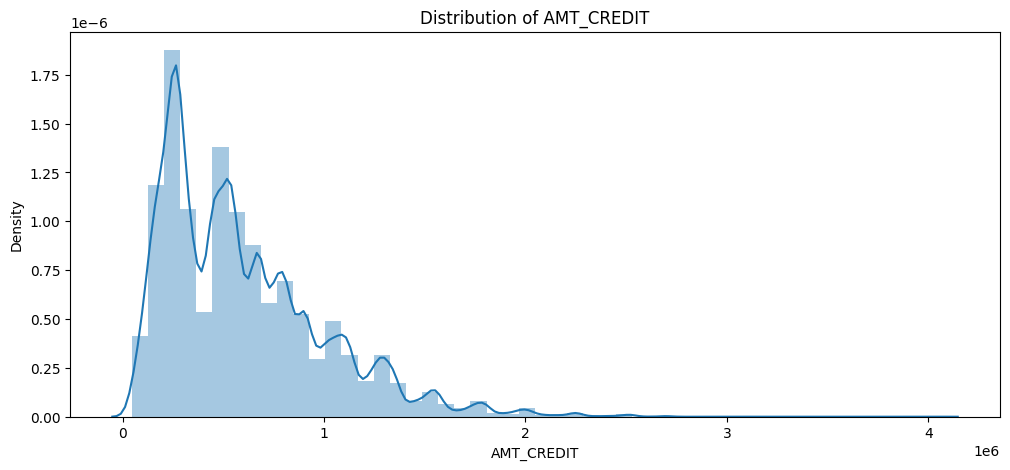

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(application_train["AMT_CREDIT"])

4.2 Distribution of AMT_INCOME_TOTAL

<ipython-input-25-d92f3b317b7c>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




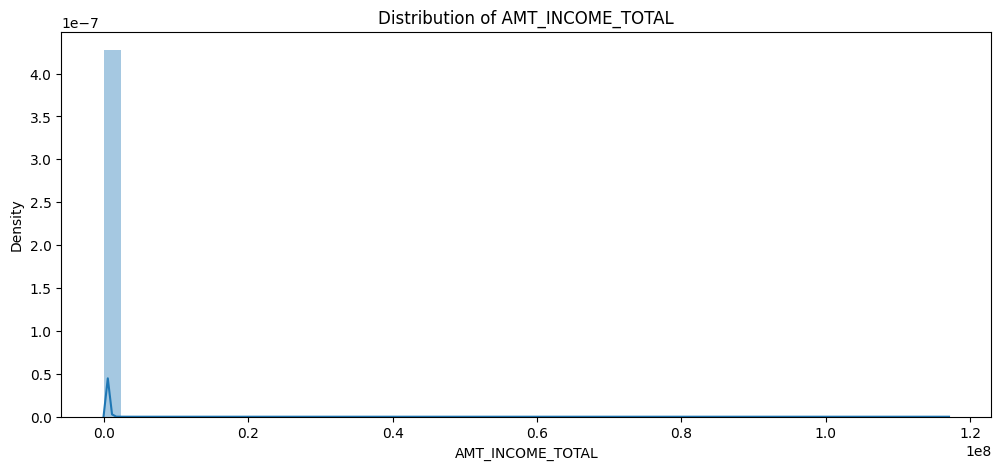

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_INCOME_TOTAL")
ax = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna())

4.3 Distribution of AMT_GOODS_PRICE

<ipython-input-26-87d9c985b0a4>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




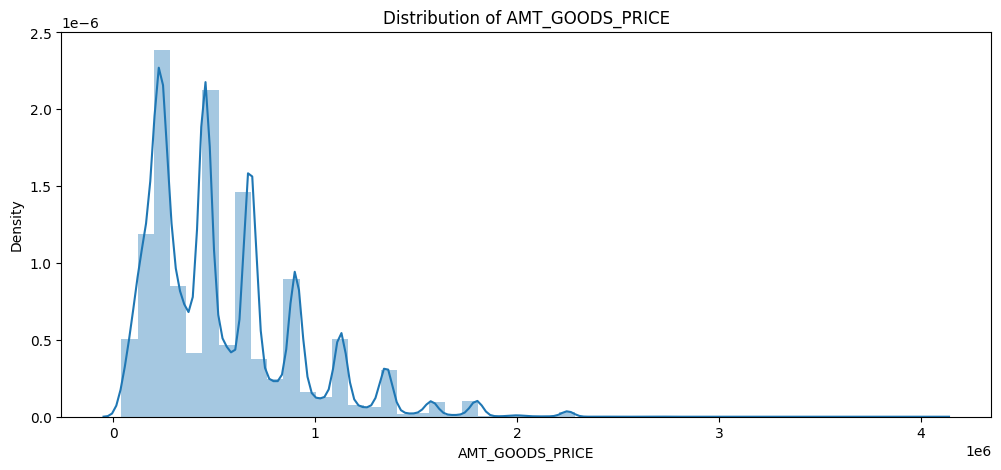

In [26]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna())

4.4 Who accompanied client when applying for the  application

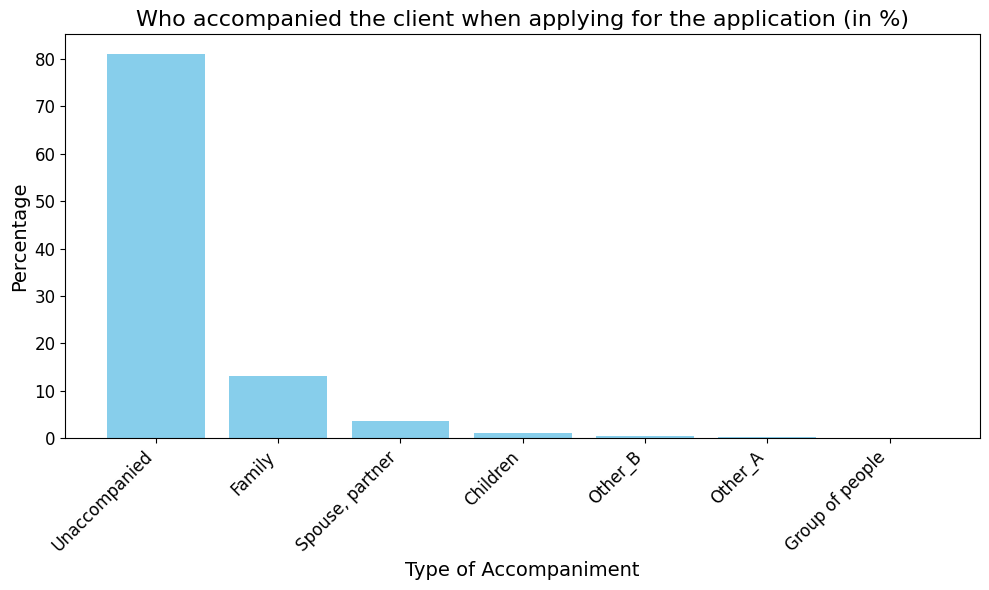

In [27]:

temp = application_train["NAME_TYPE_SUITE"].value_counts()
percentages = (temp / temp.sum()) * 100

plt.figure(figsize=(10, 6))
plt.bar(percentages.index, percentages.values, color='skyblue')

plt.title("Who accompanied the client when applying for the application (in %)", fontsize=16)
plt.xlabel("Type of Accompaniment", fontsize=14)
plt.ylabel("Percentage", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

4.5 Data is balanced or imbalanced

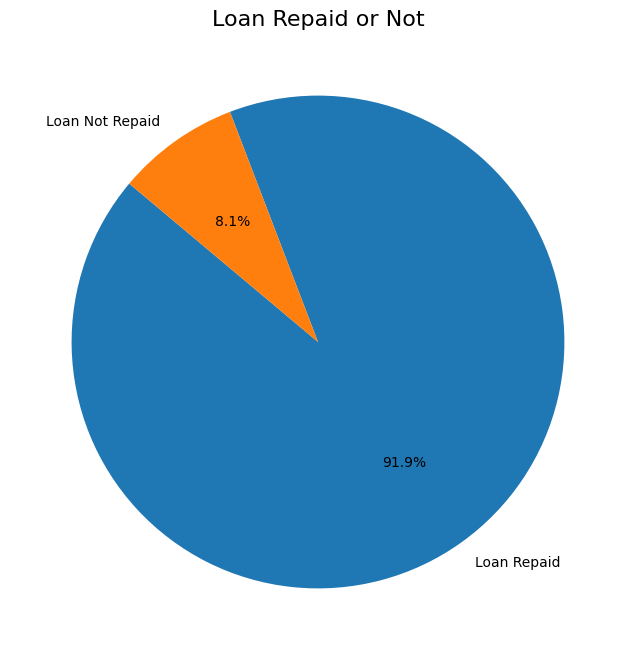

In [28]:
temp = application_train["TARGET"].value_counts()
labels = ["Loan Repaid", "Loan Not Repaid"]  # 0 = Repaid, 1 = Not Repaid

plt.figure(figsize=(8, 8))
plt.pie(temp.values, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title("Loan Repaid or Not", fontsize=16)

plt.show()

* As we can see data is highly imbalanced.

4.6 Types of loan

* **Rovolving loans :**  Arrangement which allows for the loan amount to be withdrawn, repaid, and redrawn again in any manner and any number of times, until the arrangement expires. Credit card loans and overdrafts are revolving loans. Also called evergreen loan

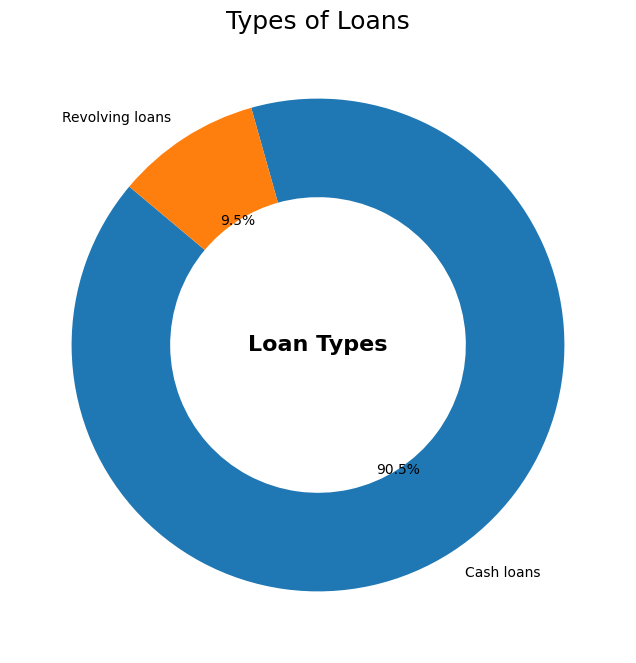

In [29]:
temp = application_train["NAME_CONTRACT_TYPE"].value_counts()

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    temp.values,
    labels=temp.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)
plt.text(0, 0, 'Loan Types', ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Types of Loans", fontsize=18)

plt.show()

* Most of the loans are Cash loans which were taken by applicants. **90.5 %** loans are Cash loans.

4.7 Purpose of loan

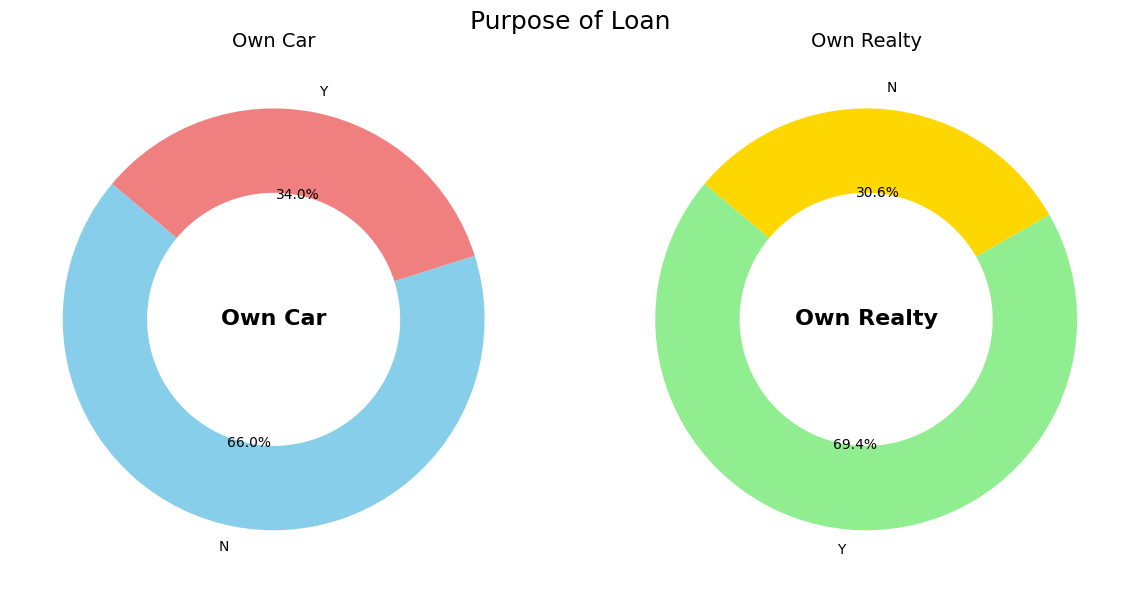

In [30]:
temp1 = application_train["FLAG_OWN_CAR"].value_counts()
temp2 = application_train["FLAG_OWN_REALTY"].value_counts()

# Create the figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Donut chart for "Own Car"
wedges1, texts1, autotexts1 = ax[0].pie(
    temp1.values,
    labels=temp1.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral'],
    wedgeprops=dict(width=0.4)
)
ax[0].text(0, 0, 'Own Car', ha='center', va='center', fontsize=16, fontweight='bold')
ax[0].set_title('Own Car', fontsize=14)

# Donut chart for "Own Realty"
wedges2, texts2, autotexts2 = ax[1].pie(
    temp2.values,
    labels=temp2.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightgreen', 'gold'],
    wedgeprops=dict(width=0.4)
)
ax[1].text(0, 0, 'Own Realty', ha='center', va='center', fontsize=16, fontweight='bold')
ax[1].set_title('Own Realty', fontsize=14)

# Adjust layout
plt.suptitle("Purpose of Loan", fontsize=18)
plt.tight_layout()
plt.show()

4.8 Income sources of Applicants who applied for loan

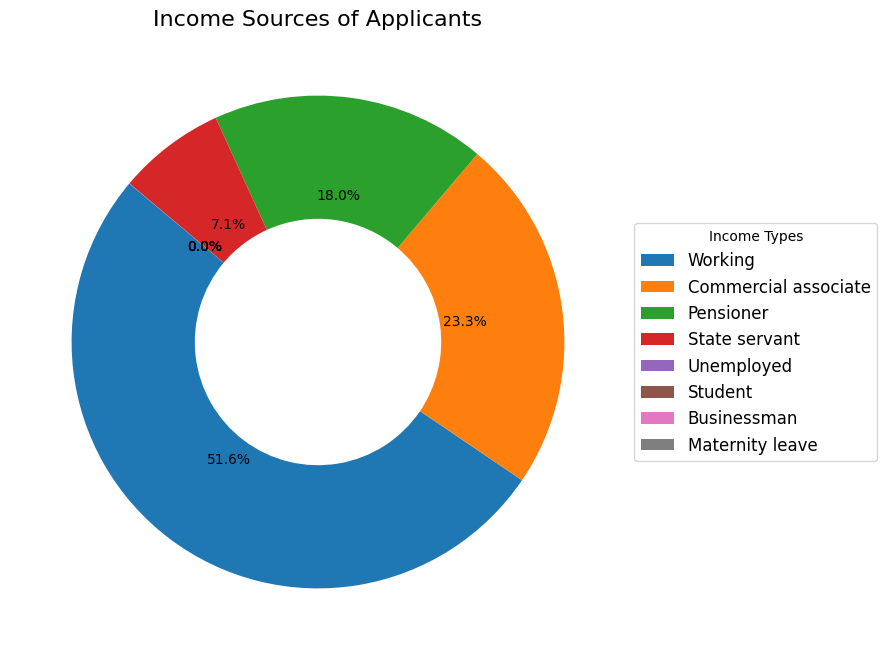

In [31]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.5)
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.title("Income Sources of Applicants", fontsize=16)

ax.legend(
    wedges,
    temp.index,
    title="Income Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.show()

* 51.6 % Applicants mentioned that they are working.  23.3 % are Commercial Associate and 18 % are Pensioner etc.

4.9 Family Status of Applicants who applied for loan

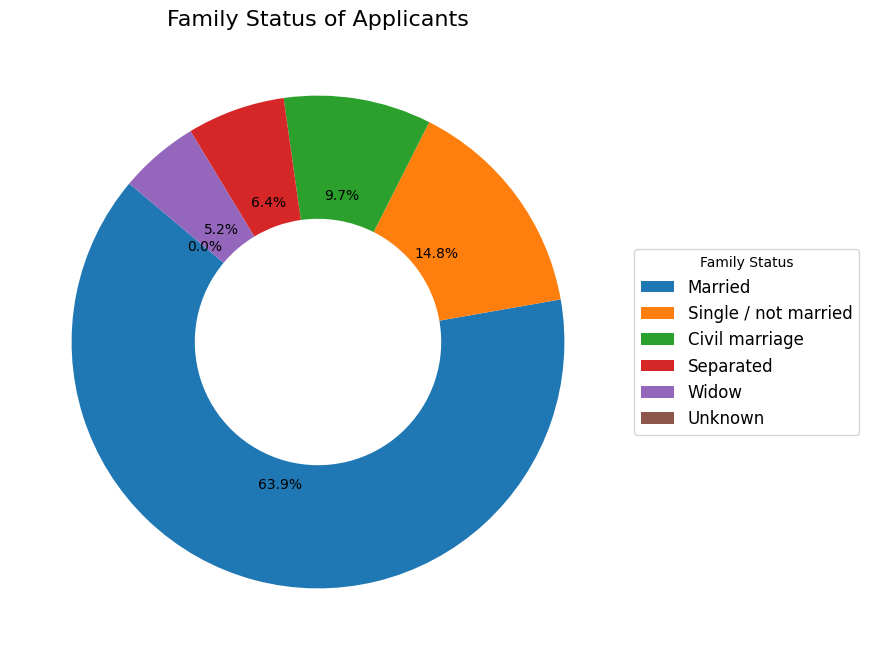

In [32]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.5)
)


for autotext in autotexts:
    autotext.set_color('black')  # Text color
    autotext.set_fontsize(10)    # Font size

plt.title("Family Status of Applicants", fontsize=16)

ax.legend(
    wedges,
    temp.index,
    title="Family Status",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Position the legend outside the chart
    fontsize=12
)

plt.show()

* 63.9 % applicants are married. 14.8 % are single etc.

4.10 Occupation of Applicants who applied for loan

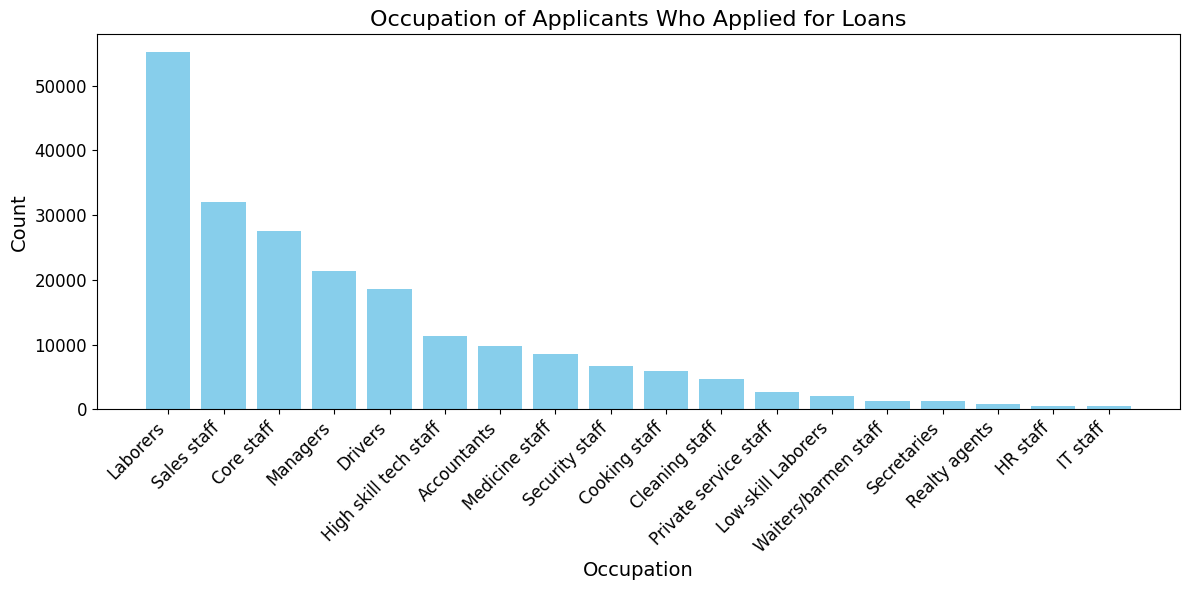

In [33]:
temp = application_train["OCCUPATION_TYPE"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(temp.index, temp.values, color='skyblue')

plt.title("Occupation of Applicants Who Applied for Loans", fontsize=16)
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

* **Top Applicants who applied for loan :**
  * Laborers - Apprx. 55 K
  * Sales Staff - Approx. 32 K
  * Core staff - Approx. 28 K
  * Managers - Approx. 21 K
  * Drivers - Approx. 19 K

4.11 Education Level of Applicants who applied for loan

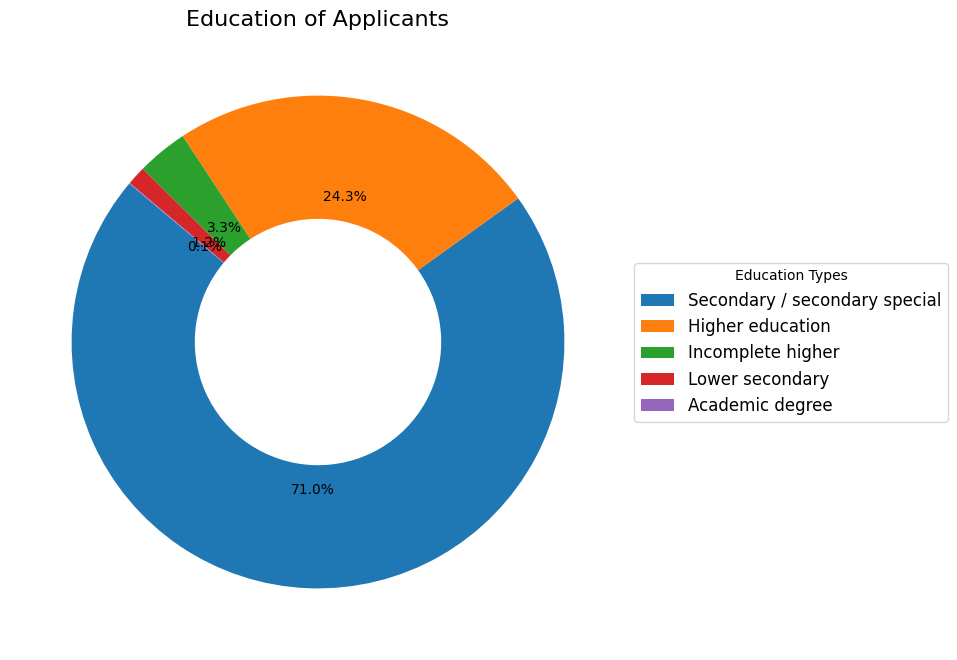

In [34]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.5)
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.title("Education of Applicants", fontsize=16)
ax.legend(
    wedges,
    temp.index,
    title="Education Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.show()

* 71 % applicants have secondary and 24.3 % having higher education.

4.12 For which types of house higher applicants applied for loan?

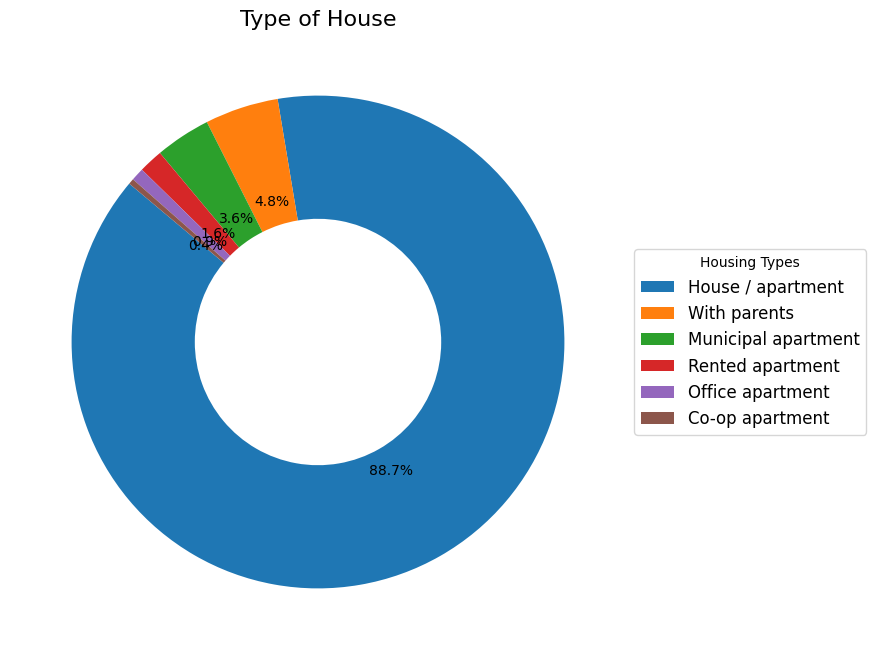

In [35]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.5)
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

plt.title("Type of House", fontsize=16)
ax.legend(
    wedges,
    temp.index,
    title="Housing Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.show()

* Approx. 89 % peoples applied for loan, they mentioned type of house is **House / Appartment**.

4.13 Types of Organizations who applied for loan

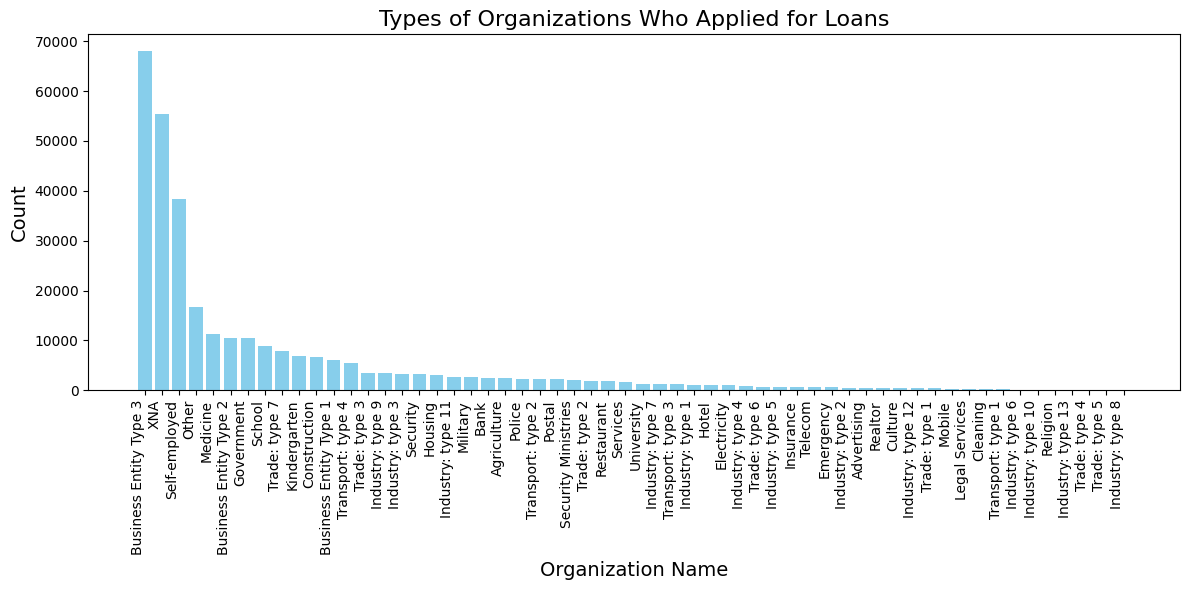

In [36]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(temp.index, temp.values, color='skyblue')
plt.title("Types of Organizations Who Applied for Loans", fontsize=16)
plt.xlabel("Organization Name", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=10, ha='right')
plt.tight_layout()
plt.show()

* **Types of Organizations who applied for loan :**
  * Business Entity Type 3 ≈ 68 K
  * XNA ≈ 55 K
  * Self employed ≈ 38 K
  * Others ≈ 17 K
  * Medicine ≈ 11 K


4.14 Exploration in terms of loan is repayed or not

4.14.1 Income sources of Applicants in terms of loan is repayed or not in %

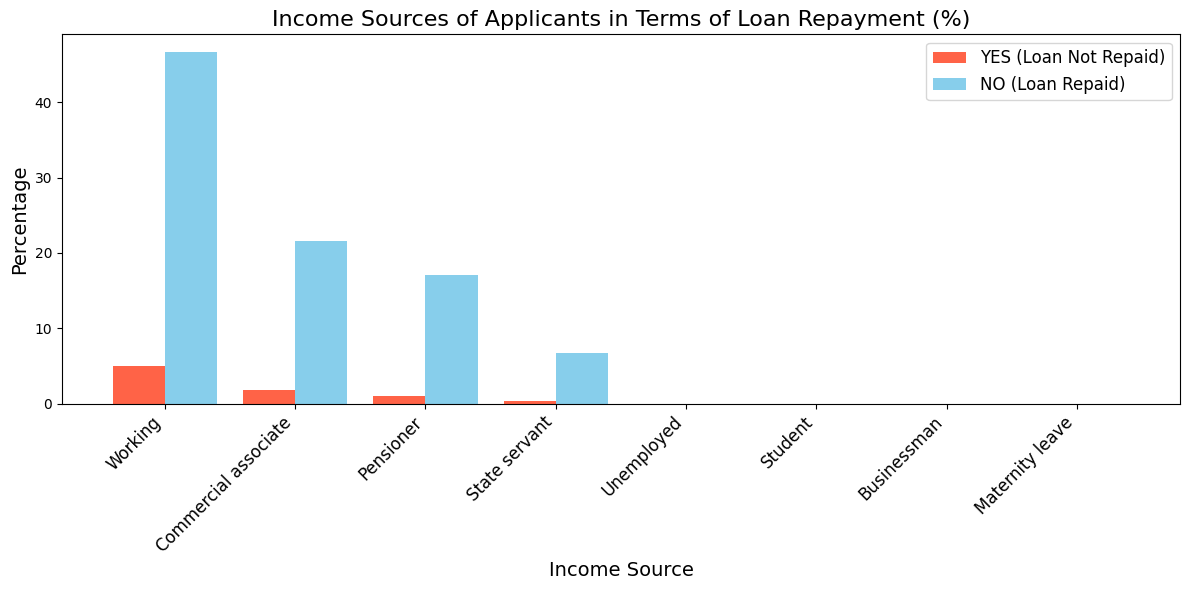

In [37]:
import numpy as np
temp = application_train["NAME_INCOME_TYPE"].value_counts()
temp_y1 = [np.sum(application_train["TARGET"][application_train["NAME_INCOME_TYPE"] == val] == 1) for val in temp.index]
temp_y0 = [np.sum(application_train["TARGET"][application_train["NAME_INCOME_TYPE"] == val] == 0) for val in temp.index]

# Convert to percentages
total = temp.sum()
percent_y1 = [(y1 / total) * 100 for y1 in temp_y1]
percent_y0 = [(y0 / total) * 100 for y0 in temp_y0]

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(temp.index))

# Plot adjacent bars
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, percent_y1, width=bar_width, label='YES (Loan Not Repaid)', color='tomato')
plt.bar(x + bar_width / 2, percent_y0, width=bar_width, label='NO (Loan Repaid)', color='skyblue')

# Add labels, title, and legend
plt.title("Income Sources of Applicants in Terms of Loan Repayment (%)", fontsize=16)
plt.xlabel("Income Source", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, temp.index, rotation=45, ha='right', fontsize=12)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

4.14.2 Family Status of Applicants in terms of loan is repayed or not in %

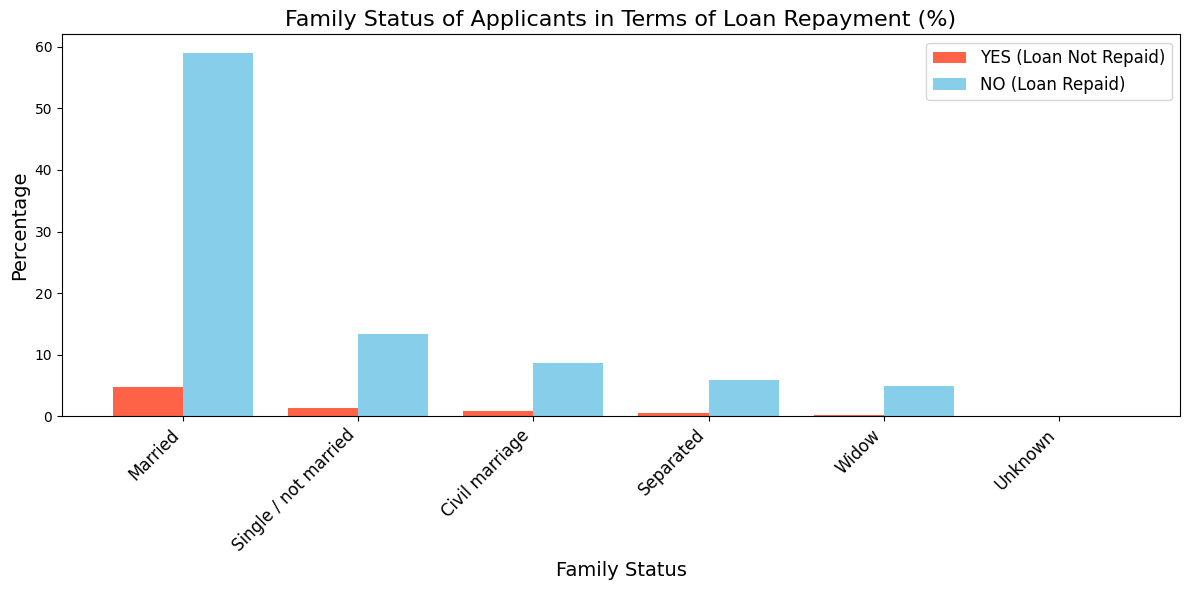

In [38]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
temp_y1 = [np.sum(application_train["TARGET"][application_train["NAME_FAMILY_STATUS"] == val] == 1) for val in temp.index]
temp_y0 = [np.sum(application_train["TARGET"][application_train["NAME_FAMILY_STATUS"] == val] == 0) for val in temp.index]

# Convert to percentages
total = temp.sum()
percent_y1 = [(y1 / total) * 100 for y1 in temp_y1]
percent_y0 = [(y0 / total) * 100 for y0 in temp_y0]

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(temp.index))

# Plot adjacent bars
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, percent_y1, width=bar_width, label='YES (Loan Not Repaid)', color='tomato')
plt.bar(x + bar_width / 2, percent_y0, width=bar_width, label='NO (Loan Repaid)', color='skyblue')

# Add labels, title, and legend
plt.title("Family Status of Applicants in Terms of Loan Repayment (%)", fontsize=16)
plt.xlabel("Family Status", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, temp.index, rotation=45, ha='right', fontsize=12)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

4.14.3 Occupation of Applicants in terms of loan is repayed or not in %

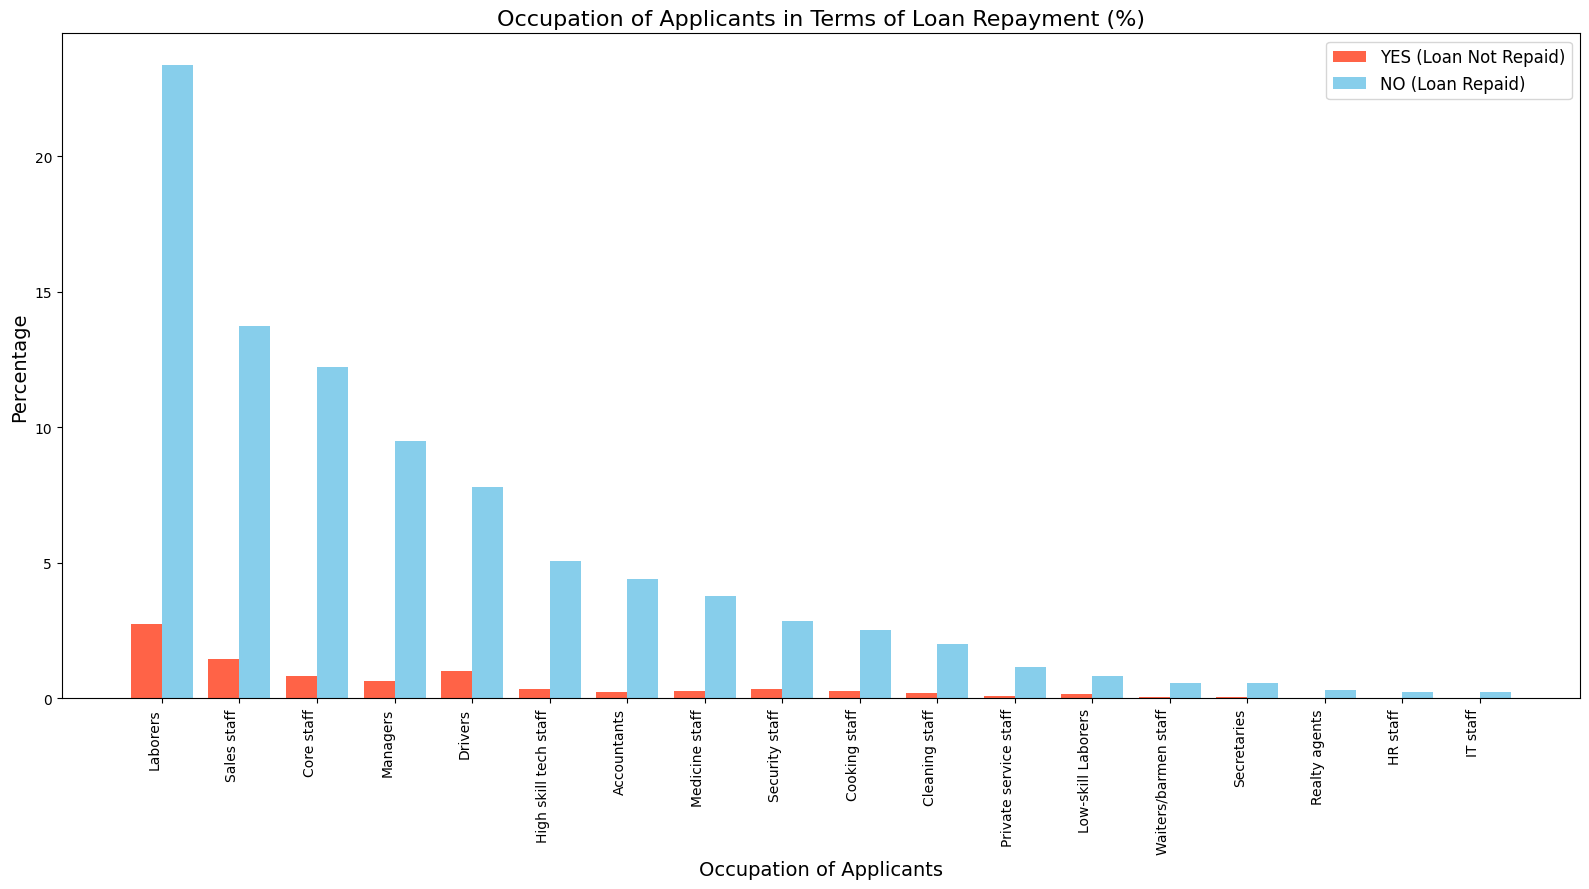

In [39]:
temp = application_train["OCCUPATION_TYPE"].value_counts()
temp_y1 = [np.sum(application_train["TARGET"][application_train["OCCUPATION_TYPE"] == val] == 1) for val in temp.index]
temp_y0 = [np.sum(application_train["TARGET"][application_train["OCCUPATION_TYPE"] == val] == 0) for val in temp.index]

# Convert to percentages
total = temp.sum()
percent_y1 = [(y1 / total) * 100 for y1 in temp_y1]
percent_y0 = [(y0 / total) * 100 for y0 in temp_y0]

# Define bar width and positions
bar_width = 0.4
x = np.arange(len(temp.index))

# Plot adjacent bars
plt.figure(figsize=(16, 9))
plt.bar(x - bar_width / 2, percent_y1, width=bar_width, label='YES (Loan Not Repaid)', color='tomato')
plt.bar(x + bar_width / 2, percent_y0, width=bar_width, label='NO (Loan Repaid)', color='skyblue')

# Add labels, title, and legend
plt.title("Occupation of Applicants in Terms of Loan Repayment (%)", fontsize=16)
plt.xlabel("Occupation of Applicants", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, temp.index, rotation=90, ha='right', fontsize=10)
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

4.14.4 Education of Applicants in terms of loan is repayed or not in %

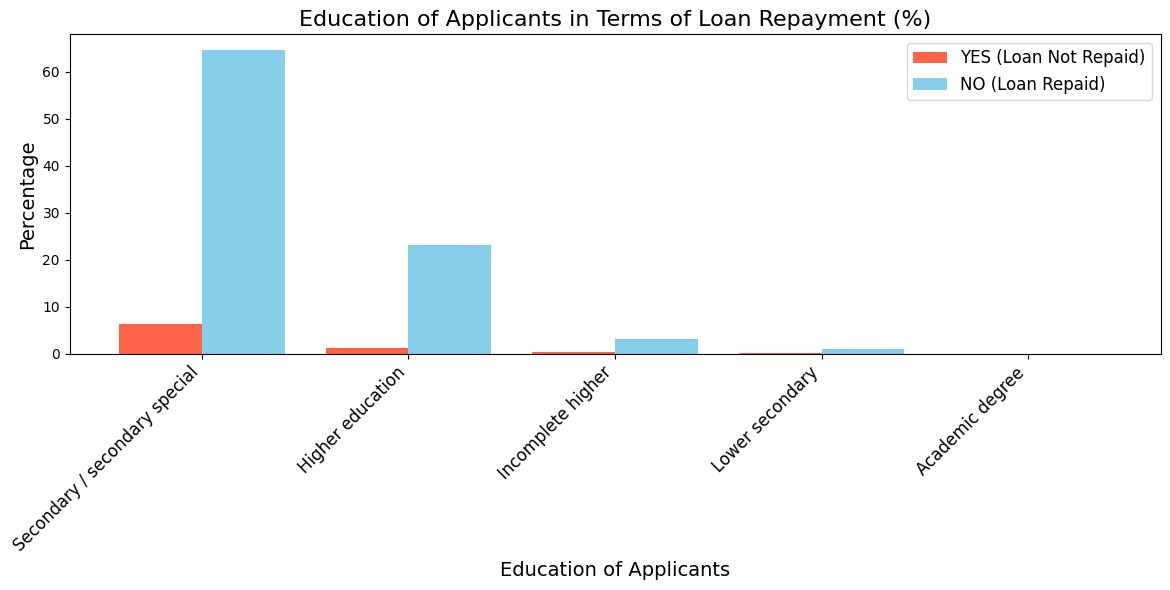

In [40]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
temp_y1 = [np.sum(application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"] == val] == 1) for val in temp.index]
temp_y0 = [np.sum(application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"] == val] == 0) for val in temp.index]

total = temp.sum()
percent_y1 = [(y1 / total) * 100 for y1 in temp_y1]
percent_y0 = [(y0 / total) * 100 for y0 in temp_y0]

bar_width = 0.4
x = np.arange(len(temp.index))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, percent_y1, width=bar_width, label='YES (Loan Not Repaid)', color='tomato')
plt.bar(x + bar_width / 2, percent_y0, width=bar_width, label='NO (Loan Repaid)', color='skyblue')

plt.title("Education of Applicants in Terms of Loan Repayment (%)", fontsize=16)
plt.xlabel("Education of Applicants", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, temp.index, rotation=45, ha='right', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

4.14.5 For which types of house higher applicants applied for loan in terms of loan is repayed or not in %

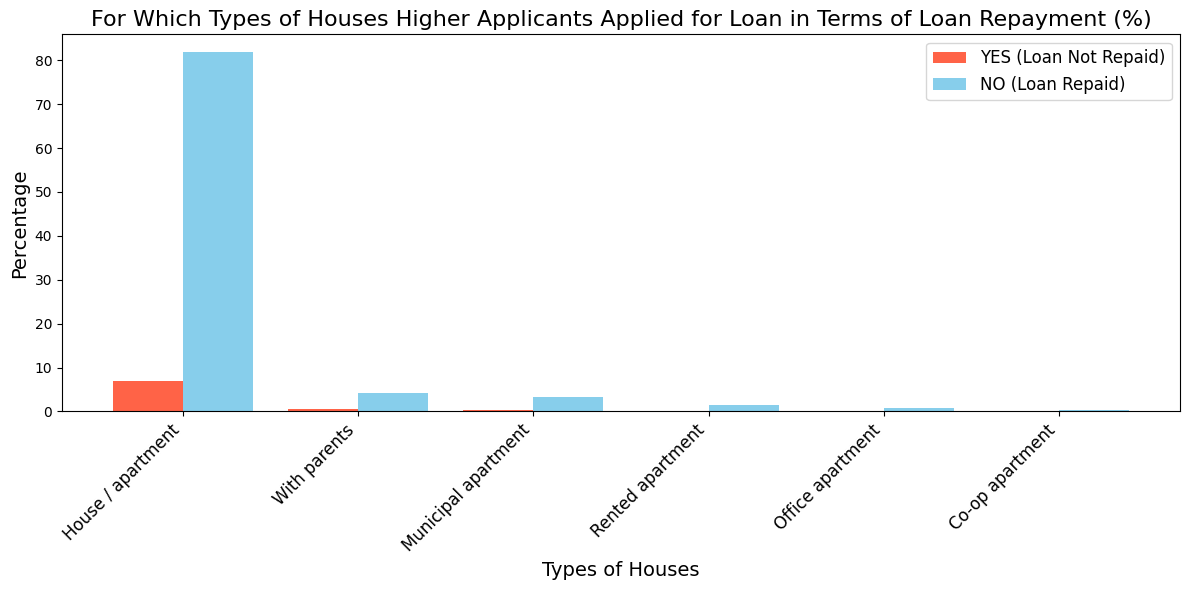

In [41]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()
temp_y1 = [np.sum(application_train["TARGET"][application_train["NAME_HOUSING_TYPE"] == val] == 1) for val in temp.index]
temp_y0 = [np.sum(application_train["TARGET"][application_train["NAME_HOUSING_TYPE"] == val] == 0) for val in temp.index]

total = temp.sum()
percent_y1 = [(y1 / total) * 100 for y1 in temp_y1]
percent_y0 = [(y0 / total) * 100 for y0 in temp_y0]

bar_width = 0.4
x = np.arange(len(temp.index))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, percent_y1, width=bar_width, label='YES (Loan Not Repaid)', color='tomato')
plt.bar(x + bar_width / 2, percent_y0, width=bar_width, label='NO (Loan Repaid)', color='skyblue')

plt.title("For Which Types of Houses Higher Applicants Applied for Loan in Terms of Loan Repayment (%)", fontsize=16)
plt.xlabel("Types of Houses", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, temp.index, rotation=45, ha='right', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

4.14.6 Types of Organizations in terms of loan is repayed or not in %

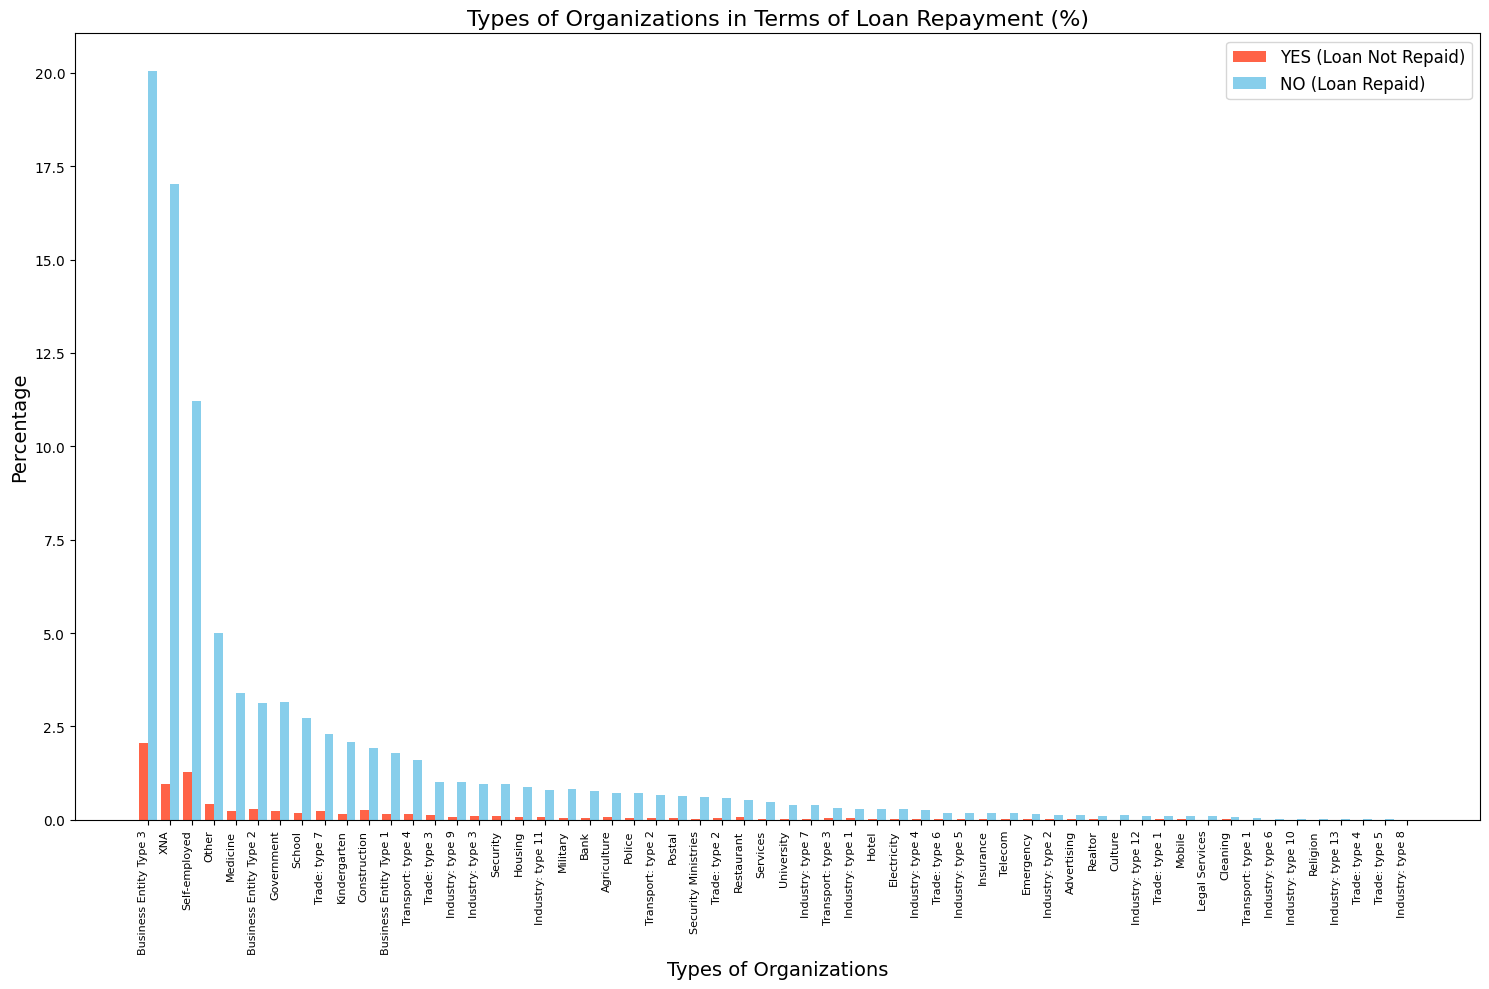

In [42]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()
temp_y1 = [np.sum(application_train["TARGET"][application_train["ORGANIZATION_TYPE"] == val] == 1) for val in temp.index]
temp_y0 = [np.sum(application_train["TARGET"][application_train["ORGANIZATION_TYPE"] == val] == 0) for val in temp.index]

total = temp.sum()
percent_y1 = [(y1 / total) * 100 for y1 in temp_y1]
percent_y0 = [(y0 / total) * 100 for y0 in temp_y0]

bar_width = 0.4
x = np.arange(len(temp.index))

plt.figure(figsize=(15, 10))
plt.bar(x - bar_width / 2, percent_y1, width=bar_width, label='YES (Loan Not Repaid)', color='tomato')
plt.bar(x + bar_width / 2, percent_y0, width=bar_width, label='NO (Loan Repaid)', color='skyblue')

plt.title("Types of Organizations in Terms of Loan Repayment (%)", fontsize=16)
plt.xlabel("Types of Organizations", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, temp.index, rotation=90, ha='right', fontsize=8)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

4.14.7 Distribution of Name of type of the Suite in terms of loan is repayed or not in %

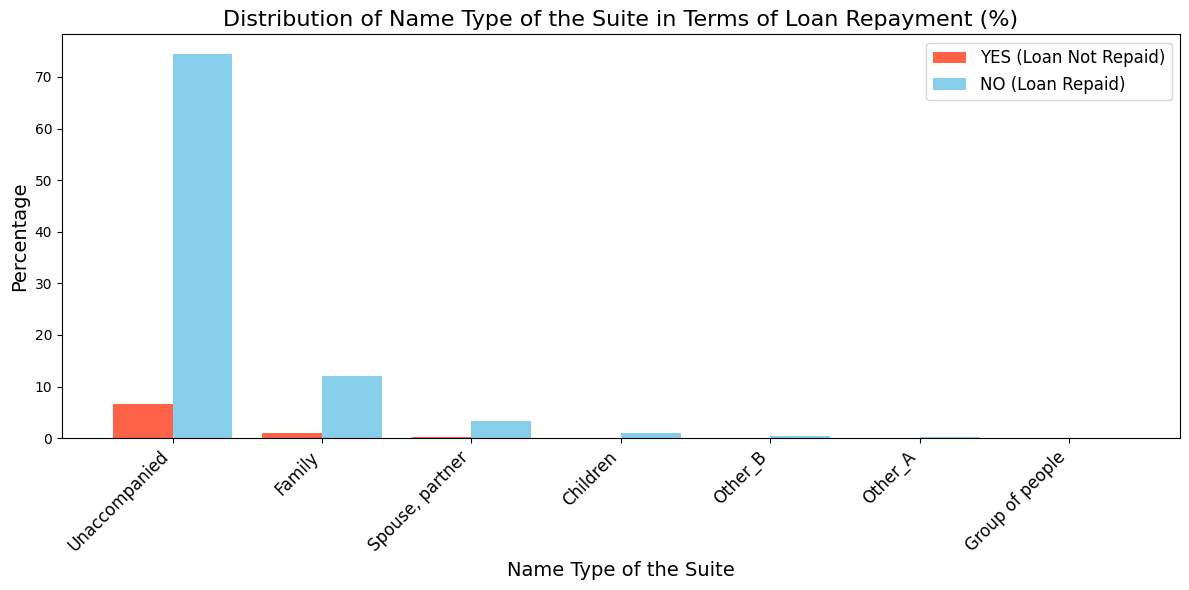

In [43]:
temp = application_train["NAME_TYPE_SUITE"].value_counts()
temp_y1 = [np.sum(application_train["TARGET"][application_train["NAME_TYPE_SUITE"] == val] == 1) for val in temp.index]
temp_y0 = [np.sum(application_train["TARGET"][application_train["NAME_TYPE_SUITE"] == val] == 0) for val in temp.index]

total = temp.sum()
percent_y1 = [(y1 / total) * 100 for y1 in temp_y1]
percent_y0 = [(y0 / total) * 100 for y0 in temp_y0]

bar_width = 0.4
x = np.arange(len(temp.index))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, percent_y1, width=bar_width, label='YES (Loan Not Repaid)', color='tomato')
plt.bar(x + bar_width / 2, percent_y0, width=bar_width, label='NO (Loan Repaid)', color='skyblue')

plt.title("Distribution of Name Type of the Suite in Terms of Loan Repayment (%)", fontsize=16)
plt.xlabel("Name Type of the Suite", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(x, temp.index, rotation=45, ha='right', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

4.15 Exploartion of previous application data

4.15.1 Contract product type of previous application

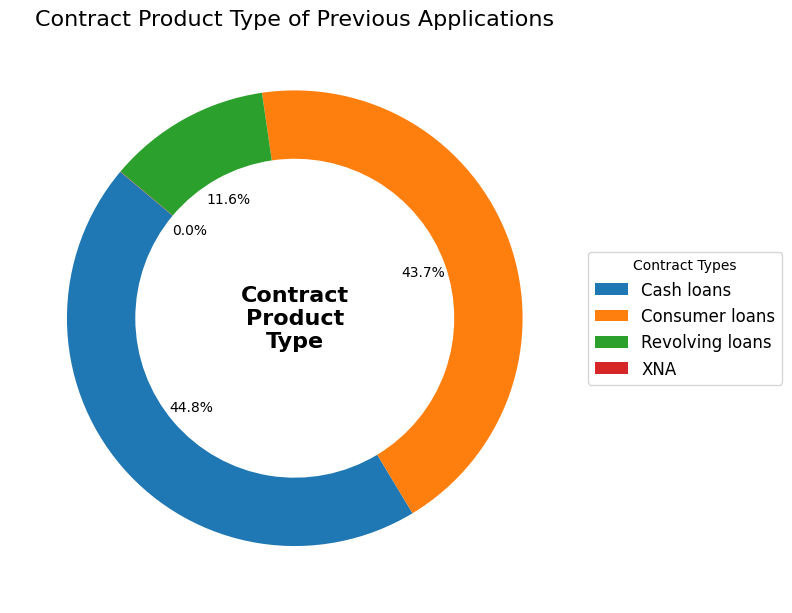

In [44]:
temp = previous_application["NAME_CONTRACT_TYPE"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)
)

ax.text(0, 0, "Contract\nProduct\nType", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Contract Product Type of Previous Applications", fontsize=16)

ax.legend(
    wedges,
    temp.index,
    title="Contract Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

* **Contract product type of previous application :**
  * Cash loans - 44.8 %
  * Consumer loans - 43.7 %
  * Rovolving loan - 11.6 %
  * XNA - 0.0207 %

4.15.2 On which day highest number of clients applied in prevoies application

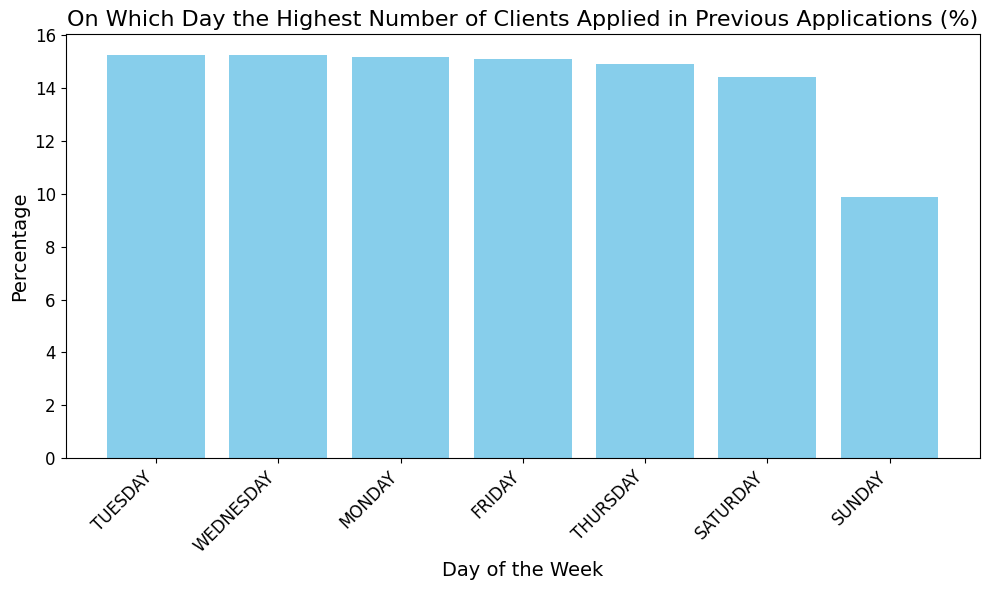

In [45]:
temp = previous_application["WEEKDAY_APPR_PROCESS_START"].value_counts()
percentage = (temp / temp.sum()) * 100

plt.figure(figsize=(10, 6))
plt.bar(percentage.index, percentage.values, color='skyblue')

plt.title("On Which Day the Highest Number of Clients Applied in Previous Applications (%)", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Percentage", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Approximately 15 % clients applied in each 5 days a week i.e, Tuesday, Wednesday, Monday, Friday and Thursday.

4.15.3 Purpose of cash loan in previous application

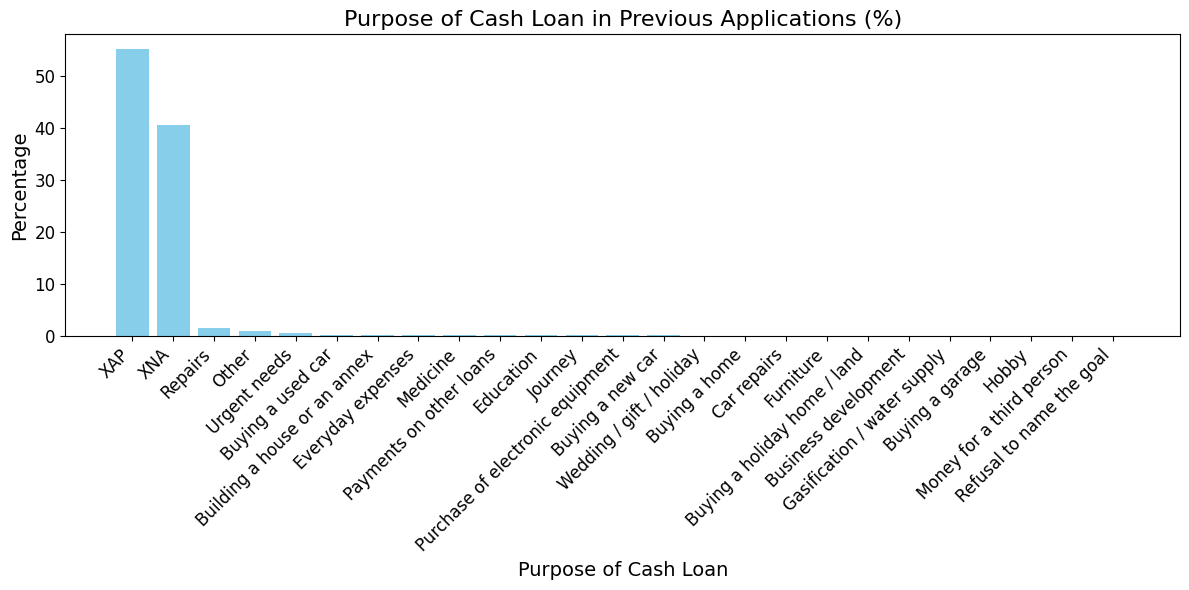

In [46]:

temp = previous_application["NAME_CASH_LOAN_PURPOSE"].value_counts()
percentage = (temp / temp.sum()) * 100

plt.figure(figsize=(12, 6))
plt.bar(percentage.index, percentage.values, color='skyblue')

plt.title("Purpose of Cash Loan in Previous Applications (%)", fontsize=16)
plt.xlabel("Purpose of Cash Loan", fontsize=14)
plt.ylabel("Percentage", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

* **Main purpose of the cash loan was  :**
  * XAP - 55 %
  * XNA - 41 %

4.15.4 Contract was approved or not in previous application

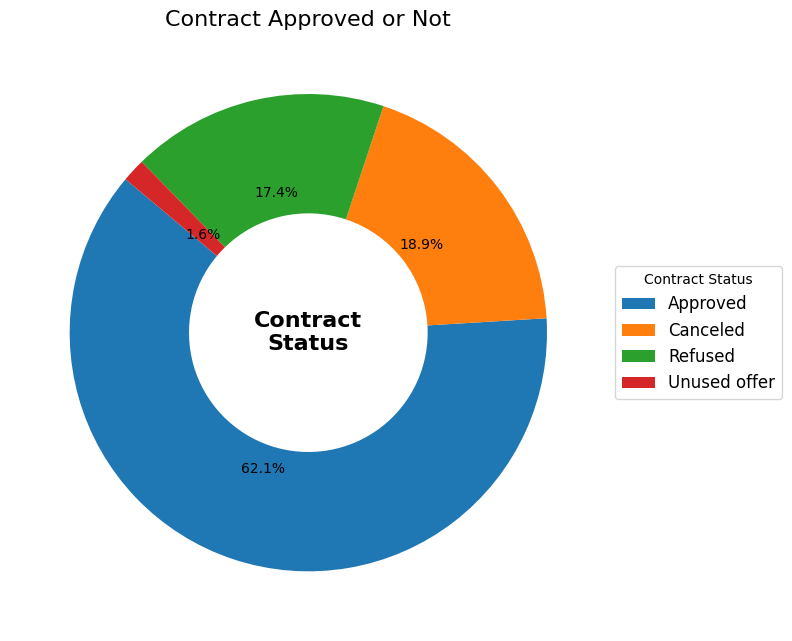

In [47]:
temp = previous_application["NAME_CONTRACT_STATUS"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.5)  # Creates the donut chart
)

ax.text(0, 0, "Contract\nStatus", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Contract Approved or Not", fontsize=16)

ax.legend(
    wedges,
    temp.index,
    title="Contract Status",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

* **Contract was approved or not in previous application :**
  * Approved : 62.1 % times
  * Cancelled : 18.9 % times
  * Refused : 17.4 % times
  * Unused offer : 1.58 % times

4.15.5 Payment method that client choose to pay for the previous application

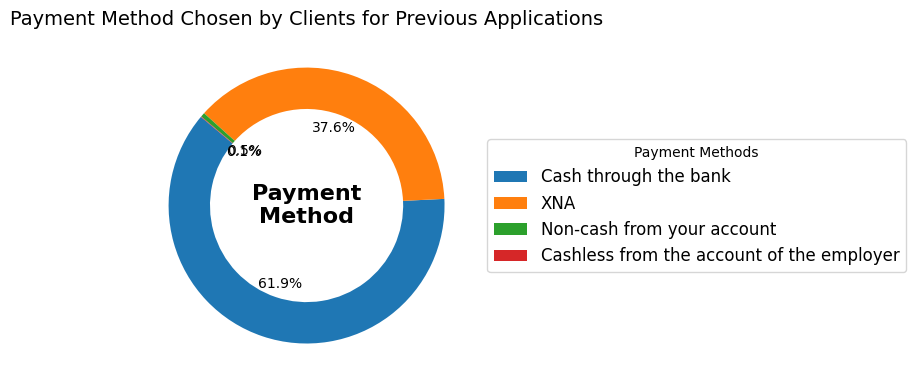

In [48]:
temp = previous_application["NAME_PAYMENT_TYPE"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)  # Creates a larger hole
)

ax.text(0, 0, "Payment\nMethod", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Payment Method Chosen by Clients for Previous Applications", fontsize=14)

ax.legend(
    wedges,
    temp.index,
    title="Payment Methods",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

* As we can observe, most of the payment(61.9 %) has been done through cash only.

4.15.6 Why was the previous application rejected?

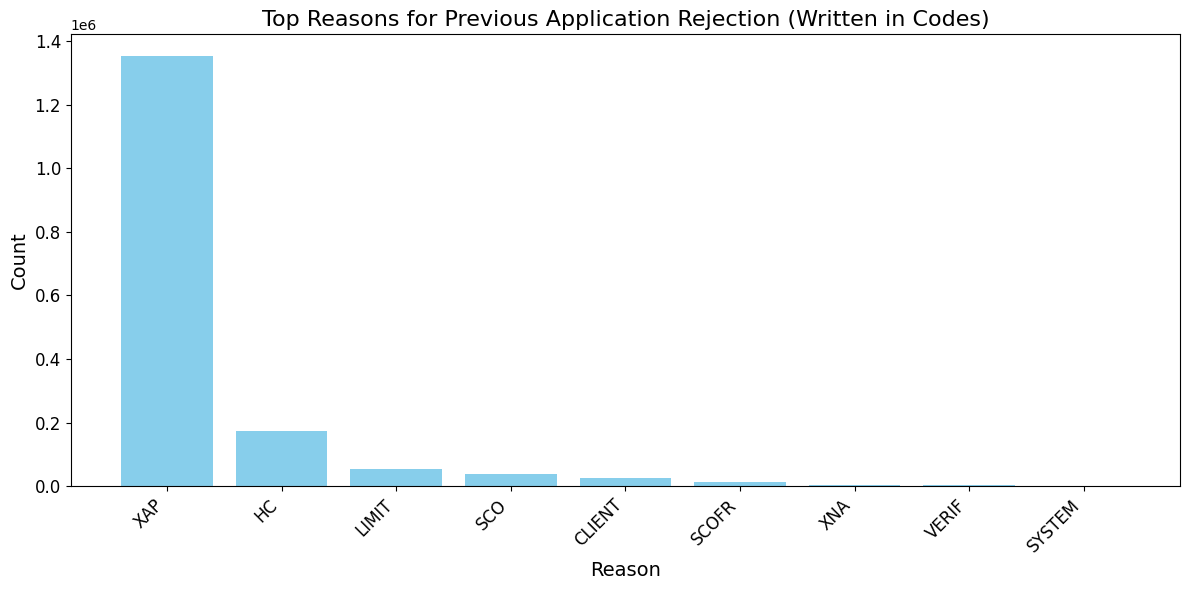

In [49]:
temp = previous_application["CODE_REJECT_REASON"].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(temp.index, temp.values, color='skyblue')

plt.title("Top Reasons for Previous Application Rejection (Written in Codes)", fontsize=16)
plt.xlabel("Reason", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

4.15.7 Who accompanied client when applying for the previous application

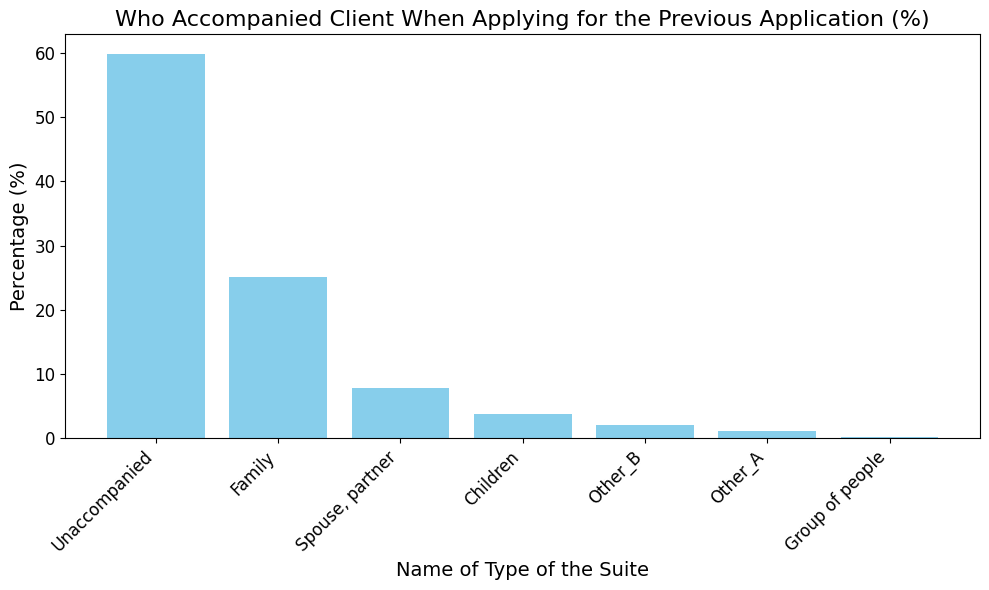

In [50]:
temp = previous_application["NAME_TYPE_SUITE"].value_counts()
percentage = (temp / temp.sum()) * 100

plt.figure(figsize=(10, 6))
plt.bar(percentage.index, percentage.values, color='skyblue')

plt.title("Who Accompanied Client When Applying for the Previous Application (%)", fontsize=16)
plt.xlabel("Name of Type of the Suite", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

* **Who accompanied client when applying for the previous application :**
  * Unaccompanied : Approx. 60 % times
  * Family : Approx. 25 % times
  * Spouse, Partner : Approx. 8 %
  * Childrens : Approx. 4 %

4.15.8 Was the client old or new client when applying for the previous application

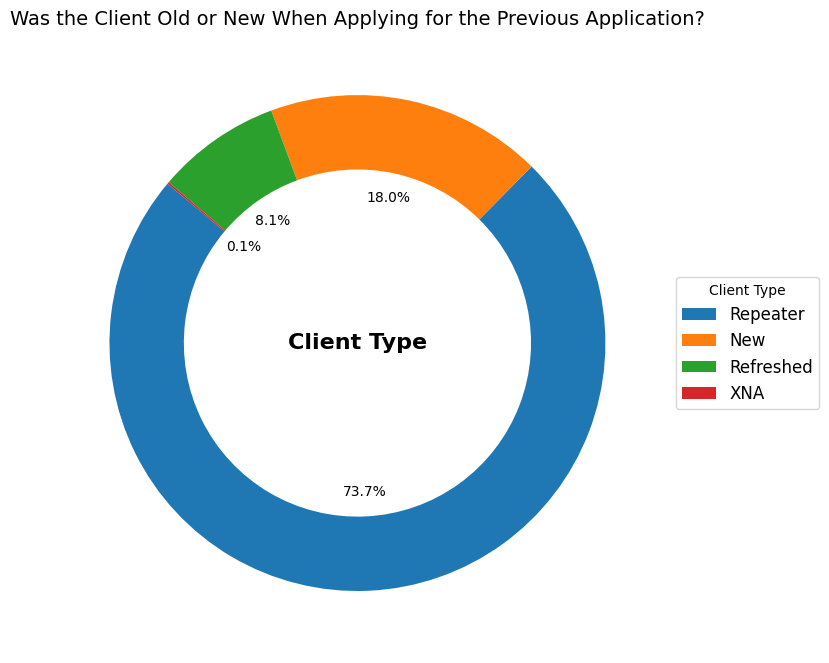

In [51]:
temp = previous_application["NAME_CLIENT_TYPE"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)  # Creates the donut chart with a hole
)

ax.text(0, 0, "Client Type", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Was the Client Old or New When Applying for the Previous Application?", fontsize=14)

ax.legend(
    wedges,
    temp.index,
    title="Client Type",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

* Approximately 74% of the clients were repeater clients who applied for previous applications.

4.15.9 What kind of goods did the client apply for in the previous application

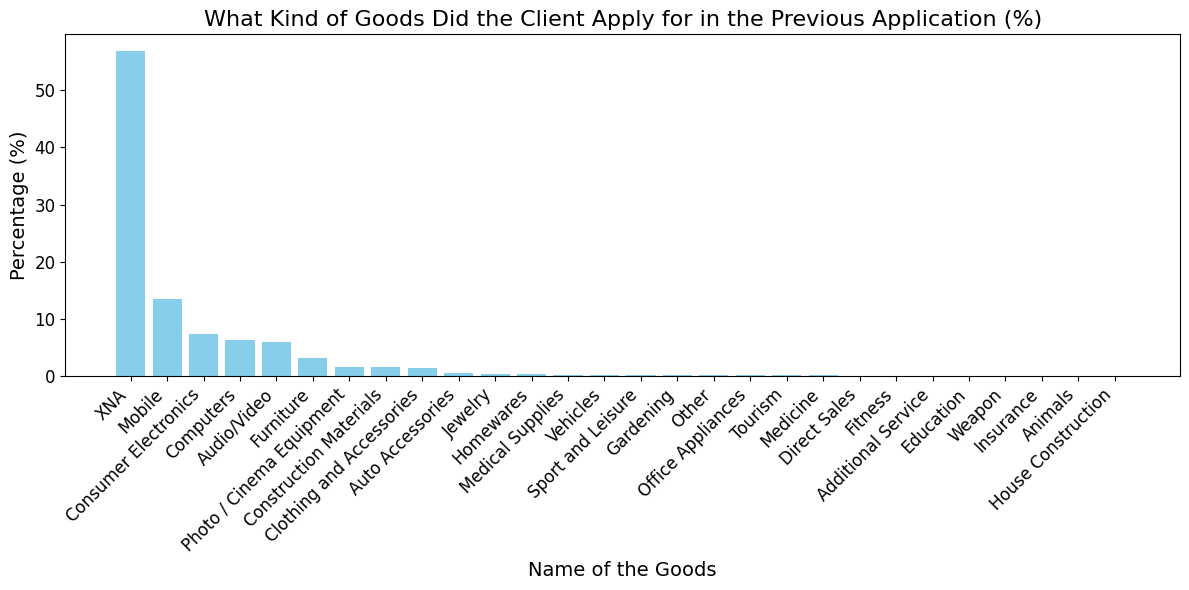

In [52]:
temp = previous_application["NAME_GOODS_CATEGORY"].value_counts()
percentage = (temp / temp.sum()) * 100

plt.figure(figsize=(12, 6))
plt.bar(percentage.index, percentage.values, color='skyblue')

plt.title("What Kind of Goods Did the Client Apply for in the Previous Application (%)", fontsize=16)
plt.xlabel("Name of the Goods", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

4.15.10 What did the client previously applied for a loan for?

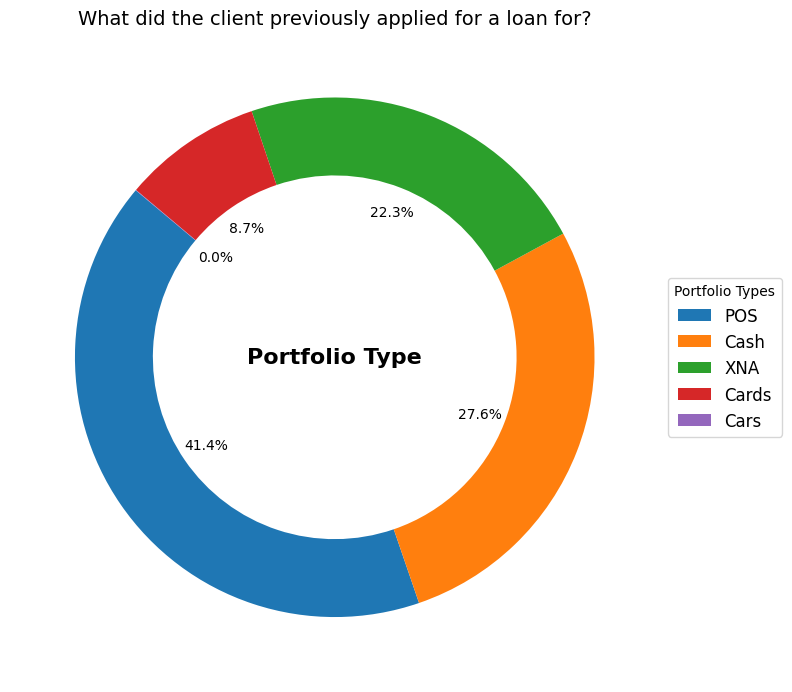

In [53]:
temp = previous_application["NAME_PORTFOLIO"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)  # Creates the donut chart with a hole
)

ax.text(0, 0, "Portfolio Type", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("What did the client previously applied for a loan for?", fontsize=14)

ax.legend(
    wedges,
    temp.index,
    title="Portfolio Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

4.15.11 Was the previous application x-sell or walk-in?

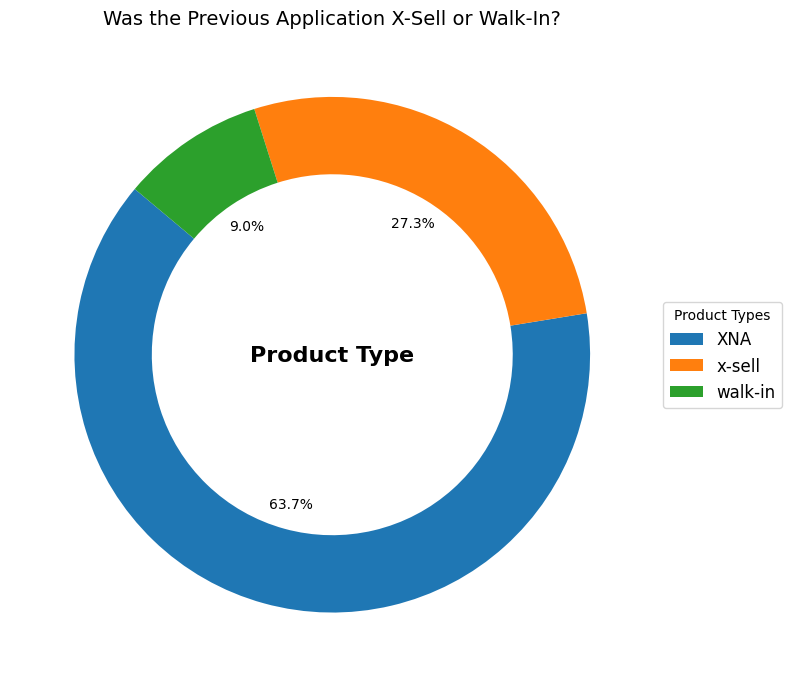

In [54]:
temp = previous_application["NAME_PRODUCT_TYPE"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)  # Creates the donut chart with a hole
)

ax.text(0, 0, "Product Type", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Was the Previous Application X-Sell or Walk-In?", fontsize=14)

ax.legend(
    wedges,
    temp.index,
    title="Product Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

4.15.12 Top channels  through which they acquired the client on the previous application

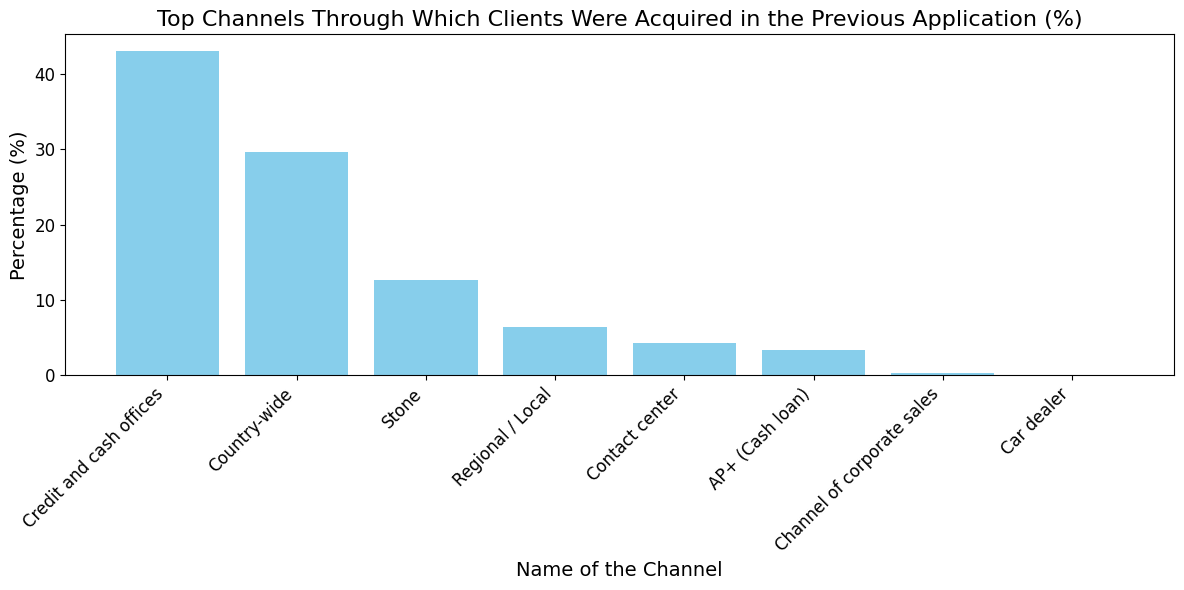

In [55]:
import matplotlib.pyplot as plt

temp = previous_application["CHANNEL_TYPE"].value_counts()
percentage = (temp / temp.sum()) * 100

plt.figure(figsize=(12, 6))
plt.bar(percentage.index, percentage.values, color='skyblue')

plt.title("Top Channels Through Which Clients Were Acquired in the Previous Application (%)", fontsize=16)
plt.xlabel("Name of the Channel", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

* **Top channels  through which they acquired the client on the previous application :**
  * Credit and cash offices : 43% of the times
  * Country_wide : 30% of the times
  * Stone : 13% of the times

4.15.13 Top industry of the seller

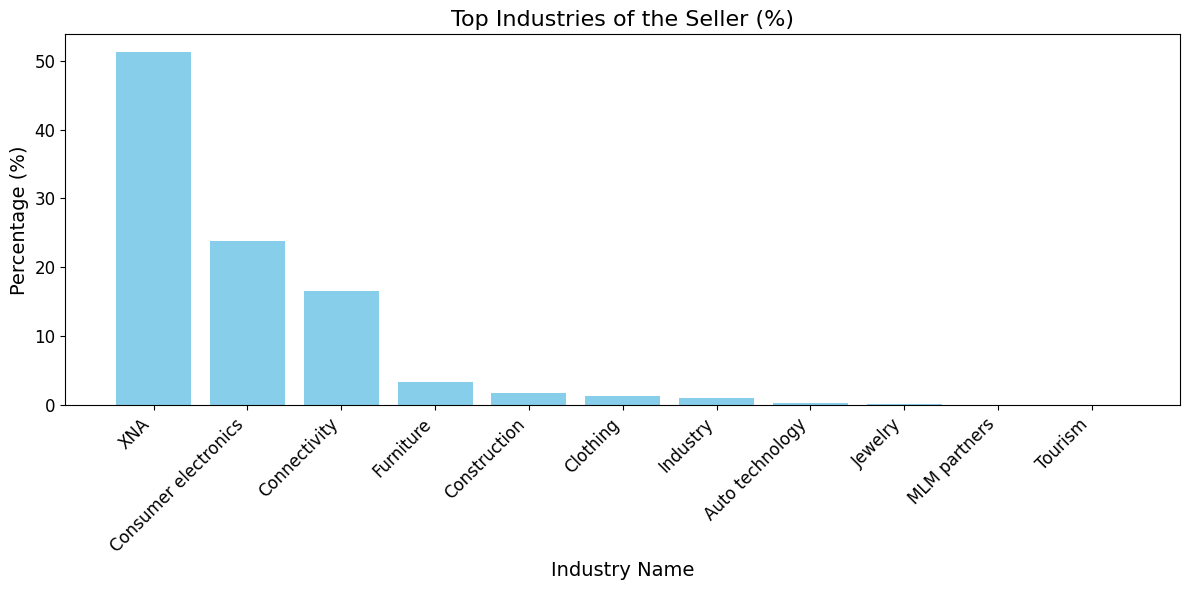

In [56]:
temp = previous_application["NAME_SELLER_INDUSTRY"].value_counts()
percentage = (temp / temp.sum()) * 100

plt.figure(figsize=(12, 6))
plt.bar(percentage.index, percentage.values, color='skyblue')

plt.title("Top Industries of the Seller (%)", fontsize=16)
plt.xlabel("Industry Name", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

4.15.14 Grouped interest rate into small medium and high of the previous application

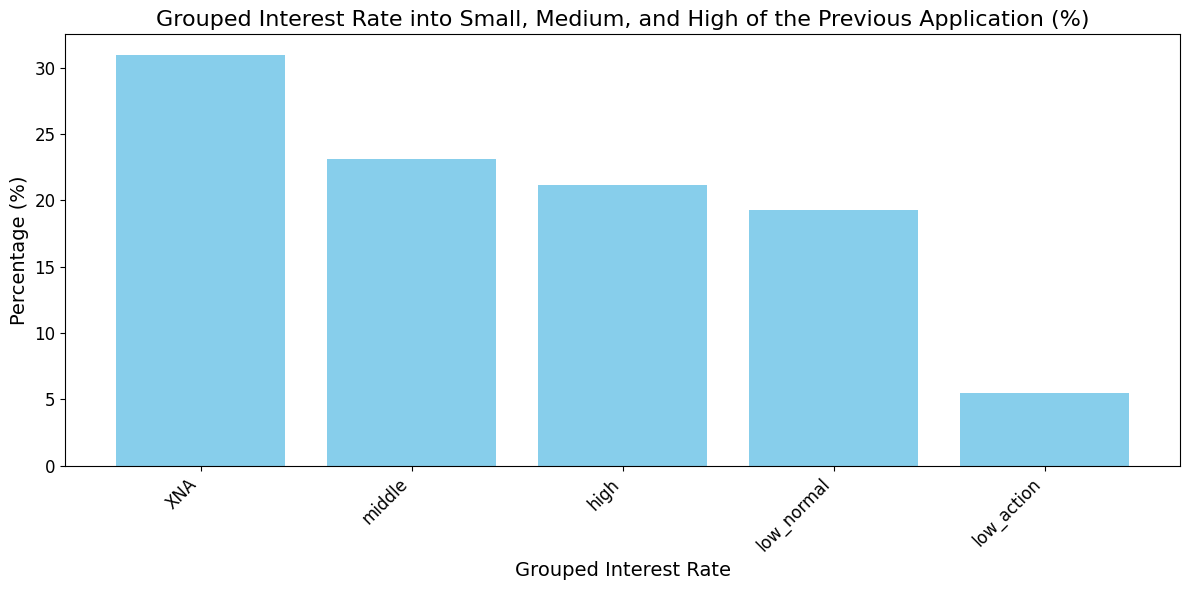

In [57]:
temp = previous_application["NAME_YIELD_GROUP"].value_counts()
percentage = (temp / temp.sum()) * 100

plt.figure(figsize=(12, 6))
plt.bar(percentage.index, percentage.values, color='skyblue')

plt.title("Grouped Interest Rate into Small, Medium, and High of the Previous Application (%)", fontsize=16)
plt.xlabel("Grouped Interest Rate", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

4.15.15 Top Detailed product combination of the previous application

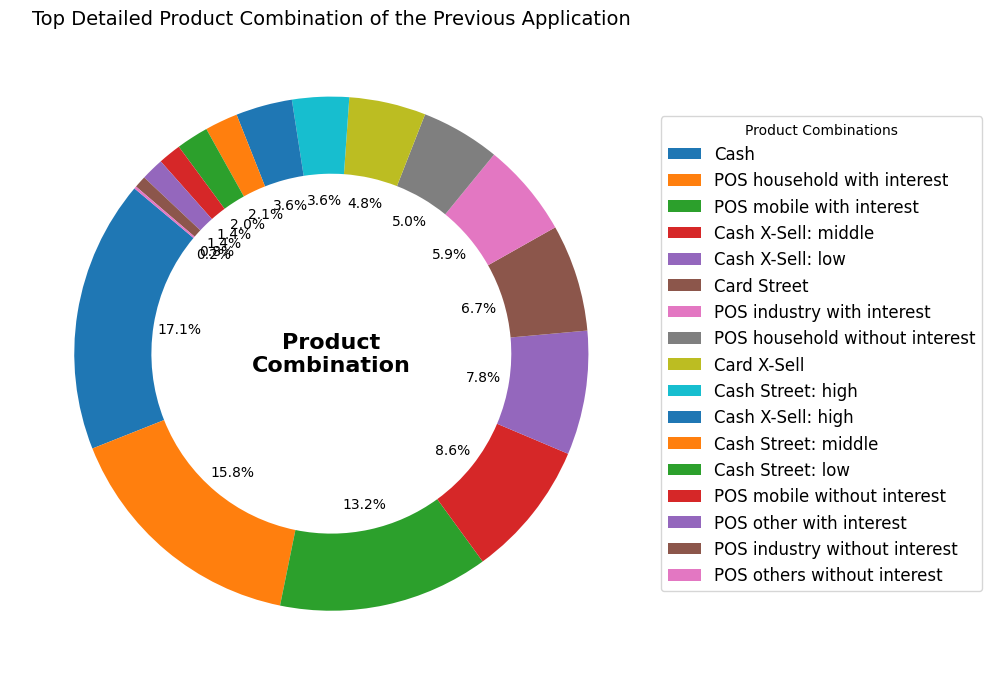

In [58]:
temp = previous_application["PRODUCT_COMBINATION"].value_counts()

fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)
)

ax.text(0, 0, "Product\nCombination", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Top Detailed Product Combination of the Previous Application", fontsize=14)

ax.legend(
    wedges,
    temp.index,
    title="Product Combinations",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()

4.15.16 Did the client requested insurance during the previous application

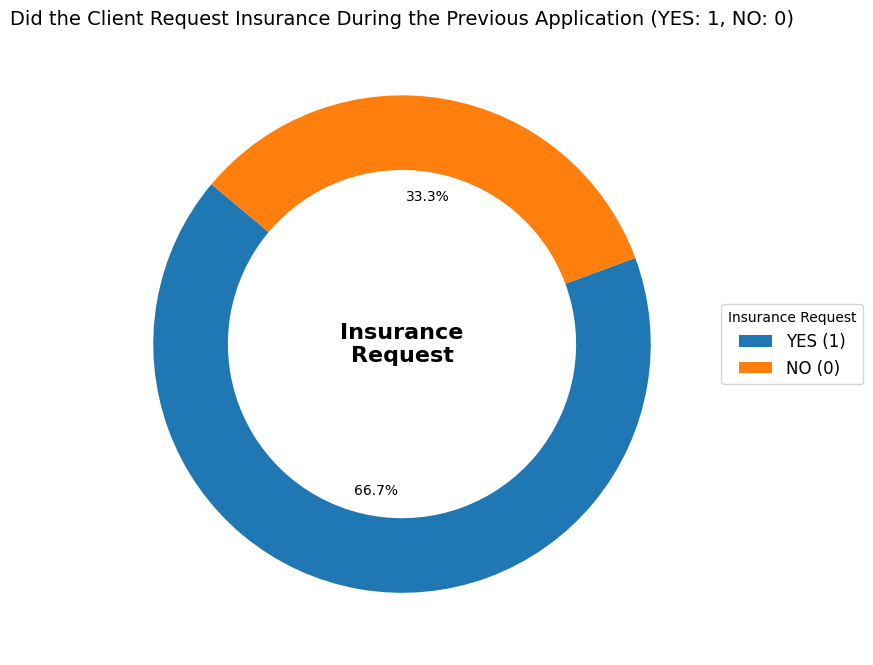

In [59]:
temp = previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    temp.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)
)

ax.text(0, 0, "Insurance\nRequest", ha='center', va='center', fontsize=16, fontweight='bold')

plt.title("Did the Client Request Insurance During the Previous Application (YES: 1, NO: 0)", fontsize=14)

ax.legend(
    wedges,
    ['YES (1)', 'NO (0)'],
    title="Insurance Request",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()